In [1]:
!nvidia-smi

Sat Mar  9 11:36:40 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.4/78.2 GB disk)


In [4]:
# Git clone method (for development)

%cd {HOME}
!git clone github.com/ultralytics/ultralytics
%cd {HOME}/ultralytics
!pip install -e .

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.4/78.2 GB disk)


In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

In [6]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="dShqxMQkcVKSaUtV1vnu")
project = rf.workspace("alpaco5-f3woi").project("part-autolabeld")
version = project.version(1)
dataset = version.download("yolov8")



/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.7 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to part-autolabeld-1 in yolov8:: 100%|██████████| 19000/19000 [00:04<00:00, 4651.36it/s]


## Custom Training

In [7]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8s-seg.pt data={dataset.location}/data.yaml epochs=10 imgsz=640

/content
100% 22.8M/22.8M [00:00<00:00, 202MB/s]
New https://pypi.org/project/ultralytics/8.1.24 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/datasets/part-autolabeld-1/data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, 

In [16]:
!ls {HOME}/runs/segment/train/

args.yaml					    MaskF1_curve.png	  train_batch1.jpg
BoxF1_curve.png					    MaskP_curve.png	  train_batch2.jpg
BoxP_curve.png					    MaskPR_curve.png	  val_batch0_labels.jpg
BoxPR_curve.png					    MaskR_curve.png	  val_batch0_pred.jpg
BoxR_curve.png					    model_artifacts.json  val_batch1_labels.jpg
confusion_matrix_normalized.png			    results.csv		  val_batch1_pred.jpg
confusion_matrix.png				    results.png		  val_batch2_labels.jpg
events.out.tfevents.1709984265.eb94338414fd.1289.0  roboflow_deploy.zip   val_batch2_pred.jpg
labels_correlogram.jpg				    state_dict.pt	  weights
labels.jpg					    train_batch0.jpg


/content


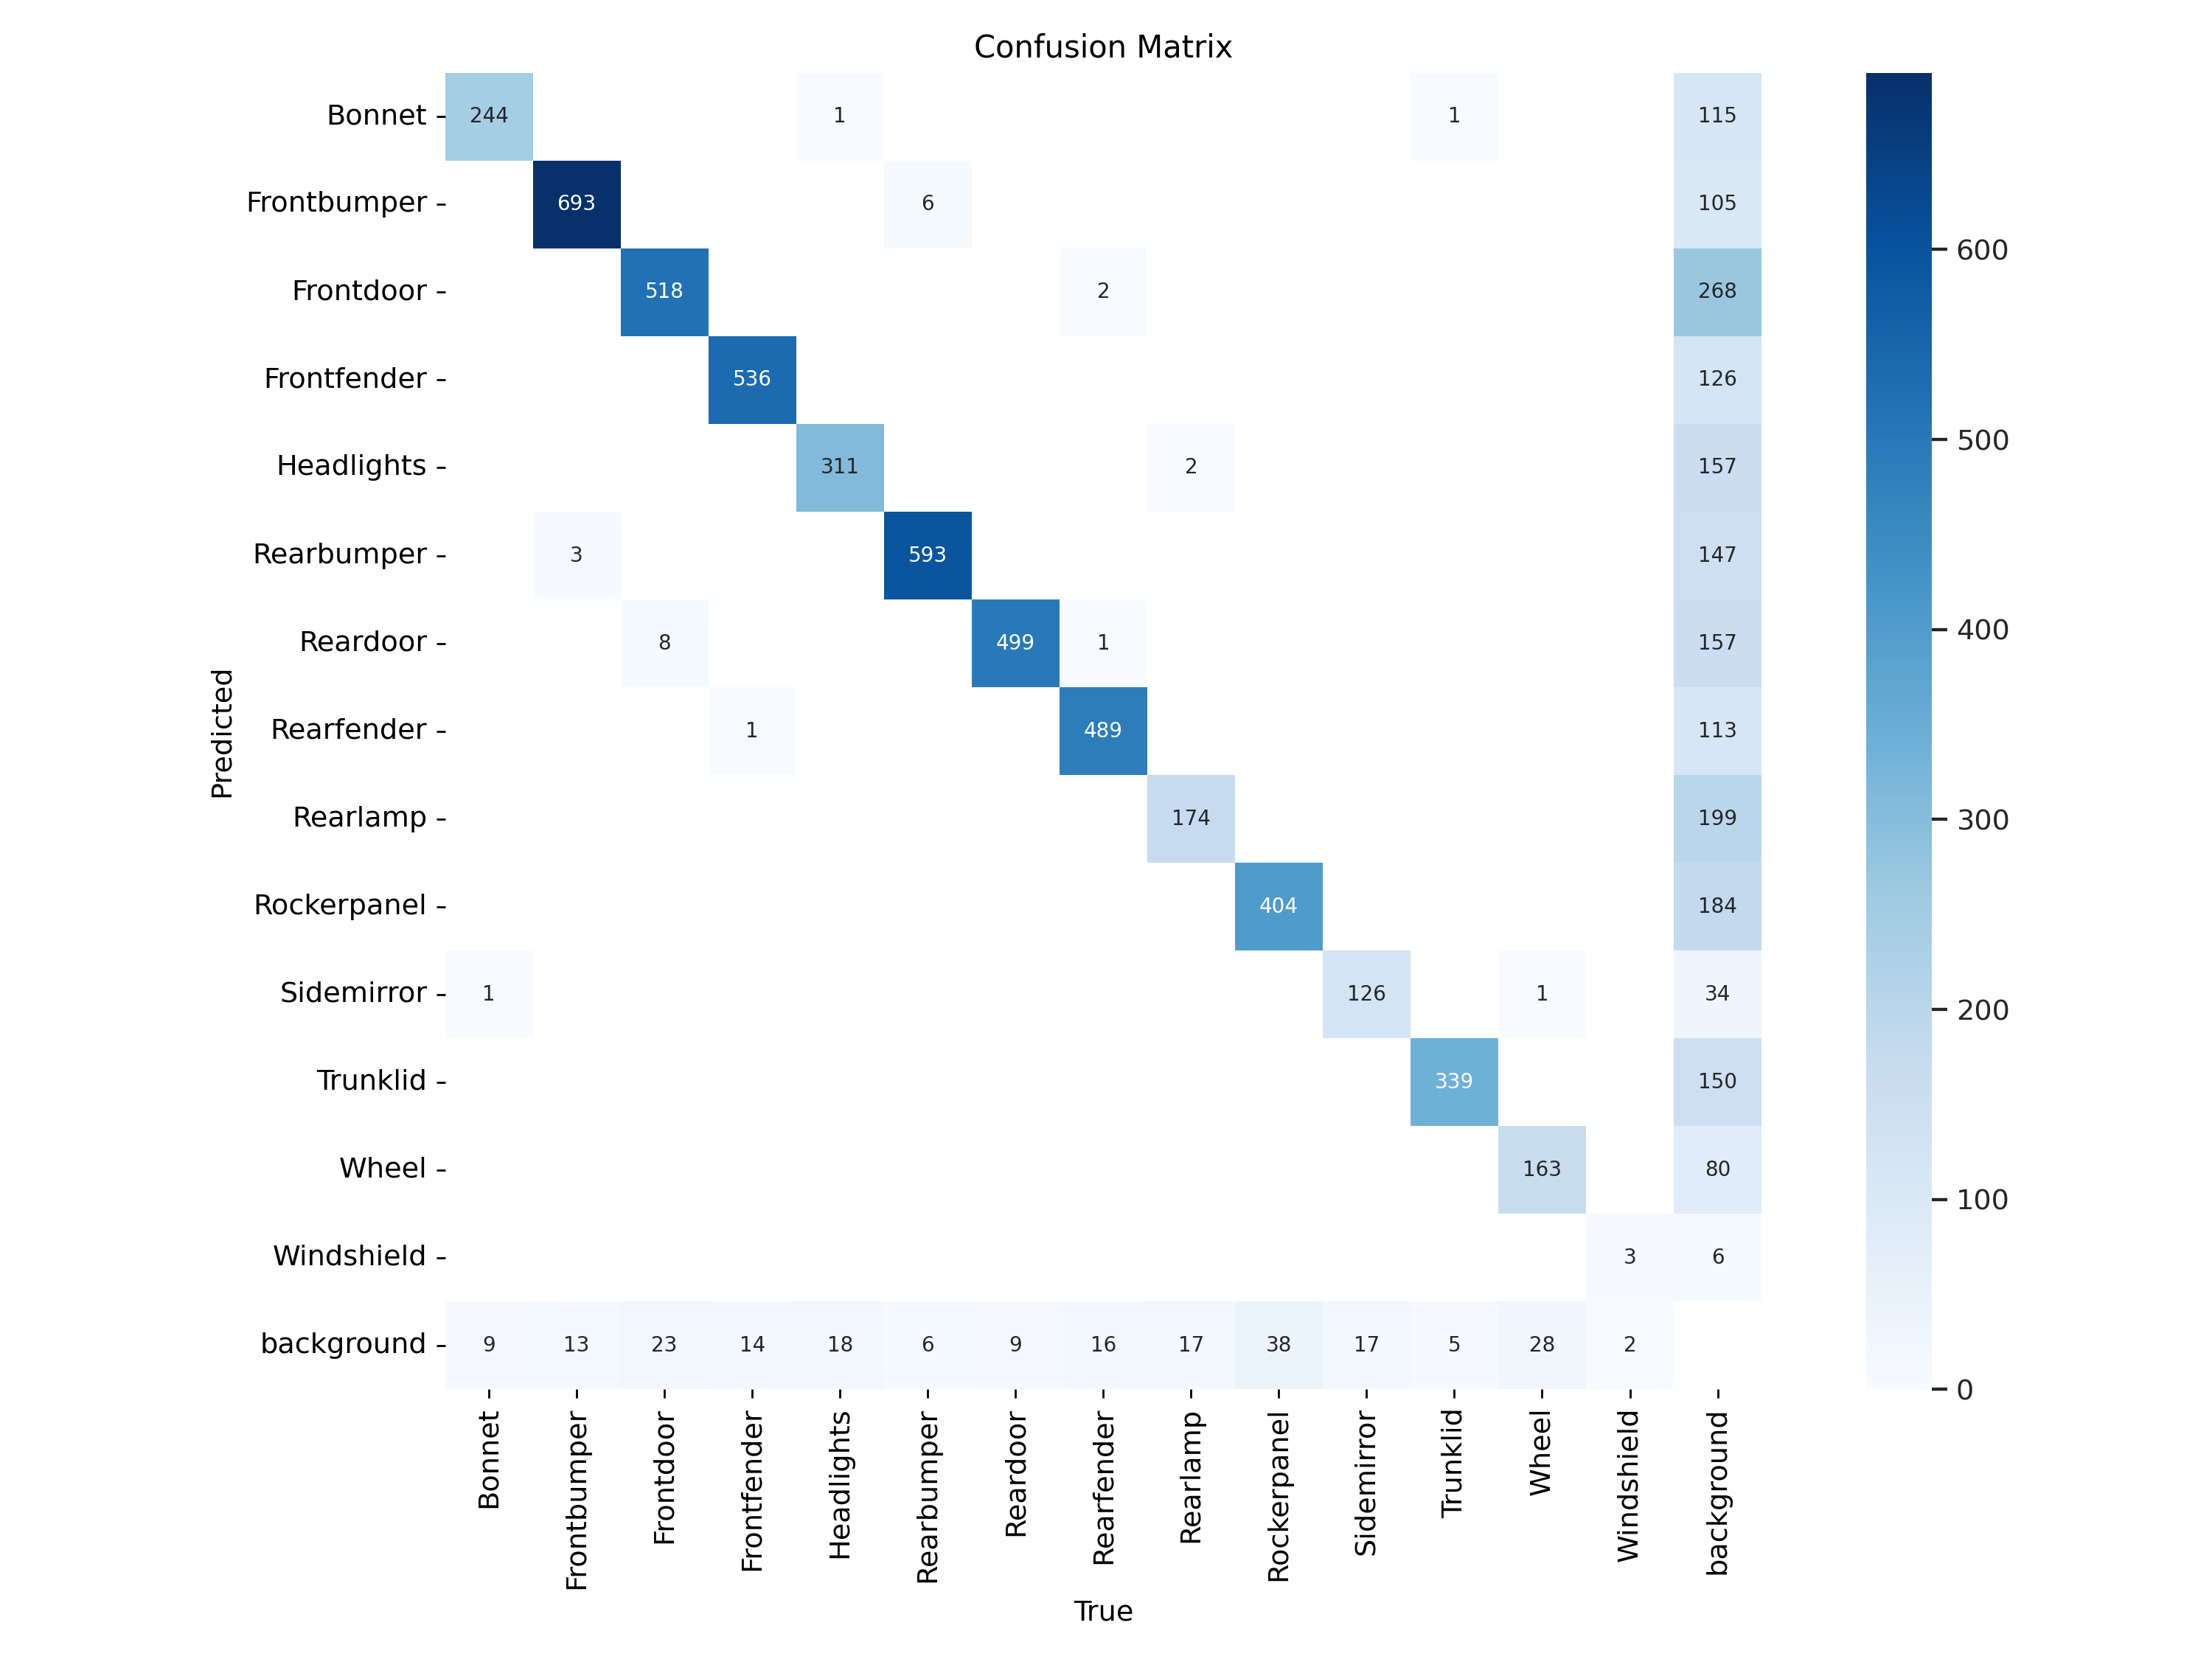

In [17]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=600)

/content


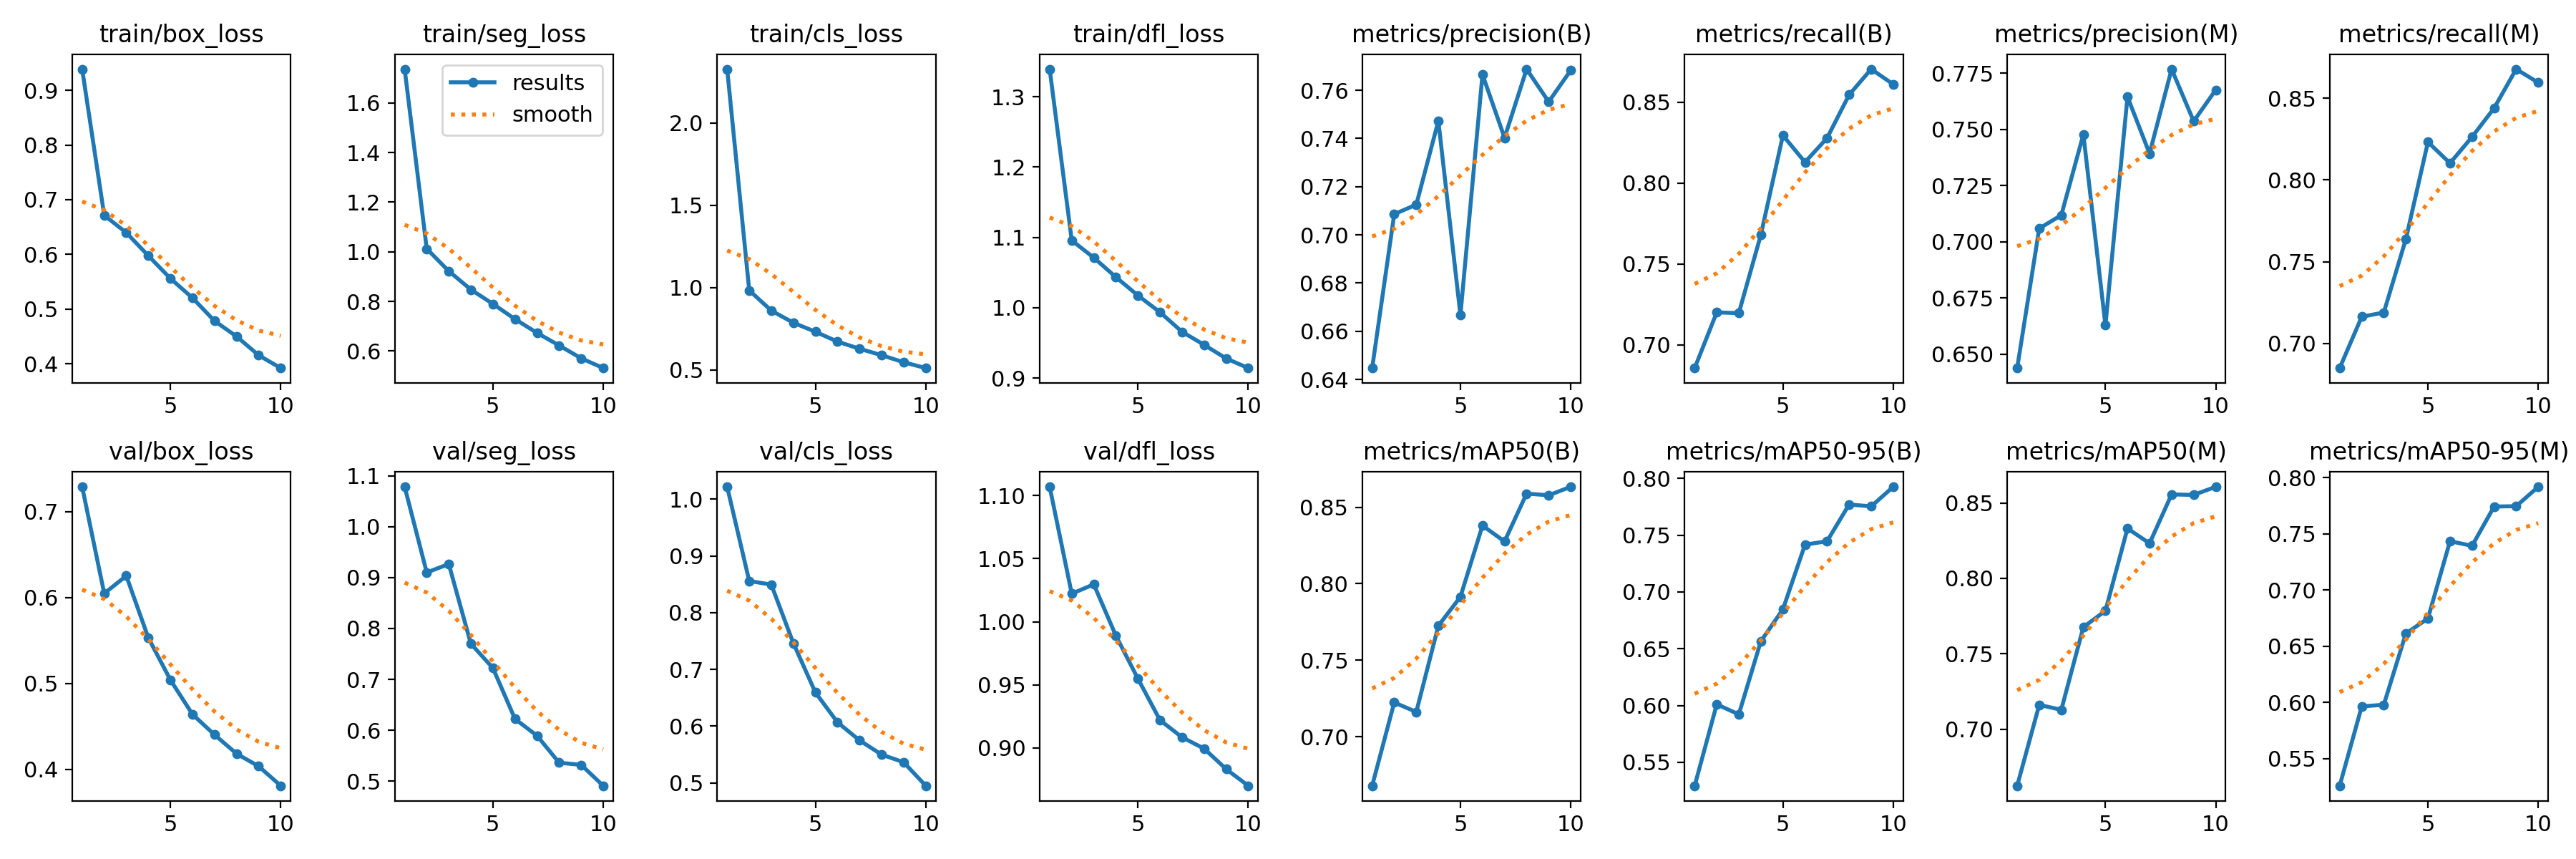

In [18]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/results.png', width=600)

/content


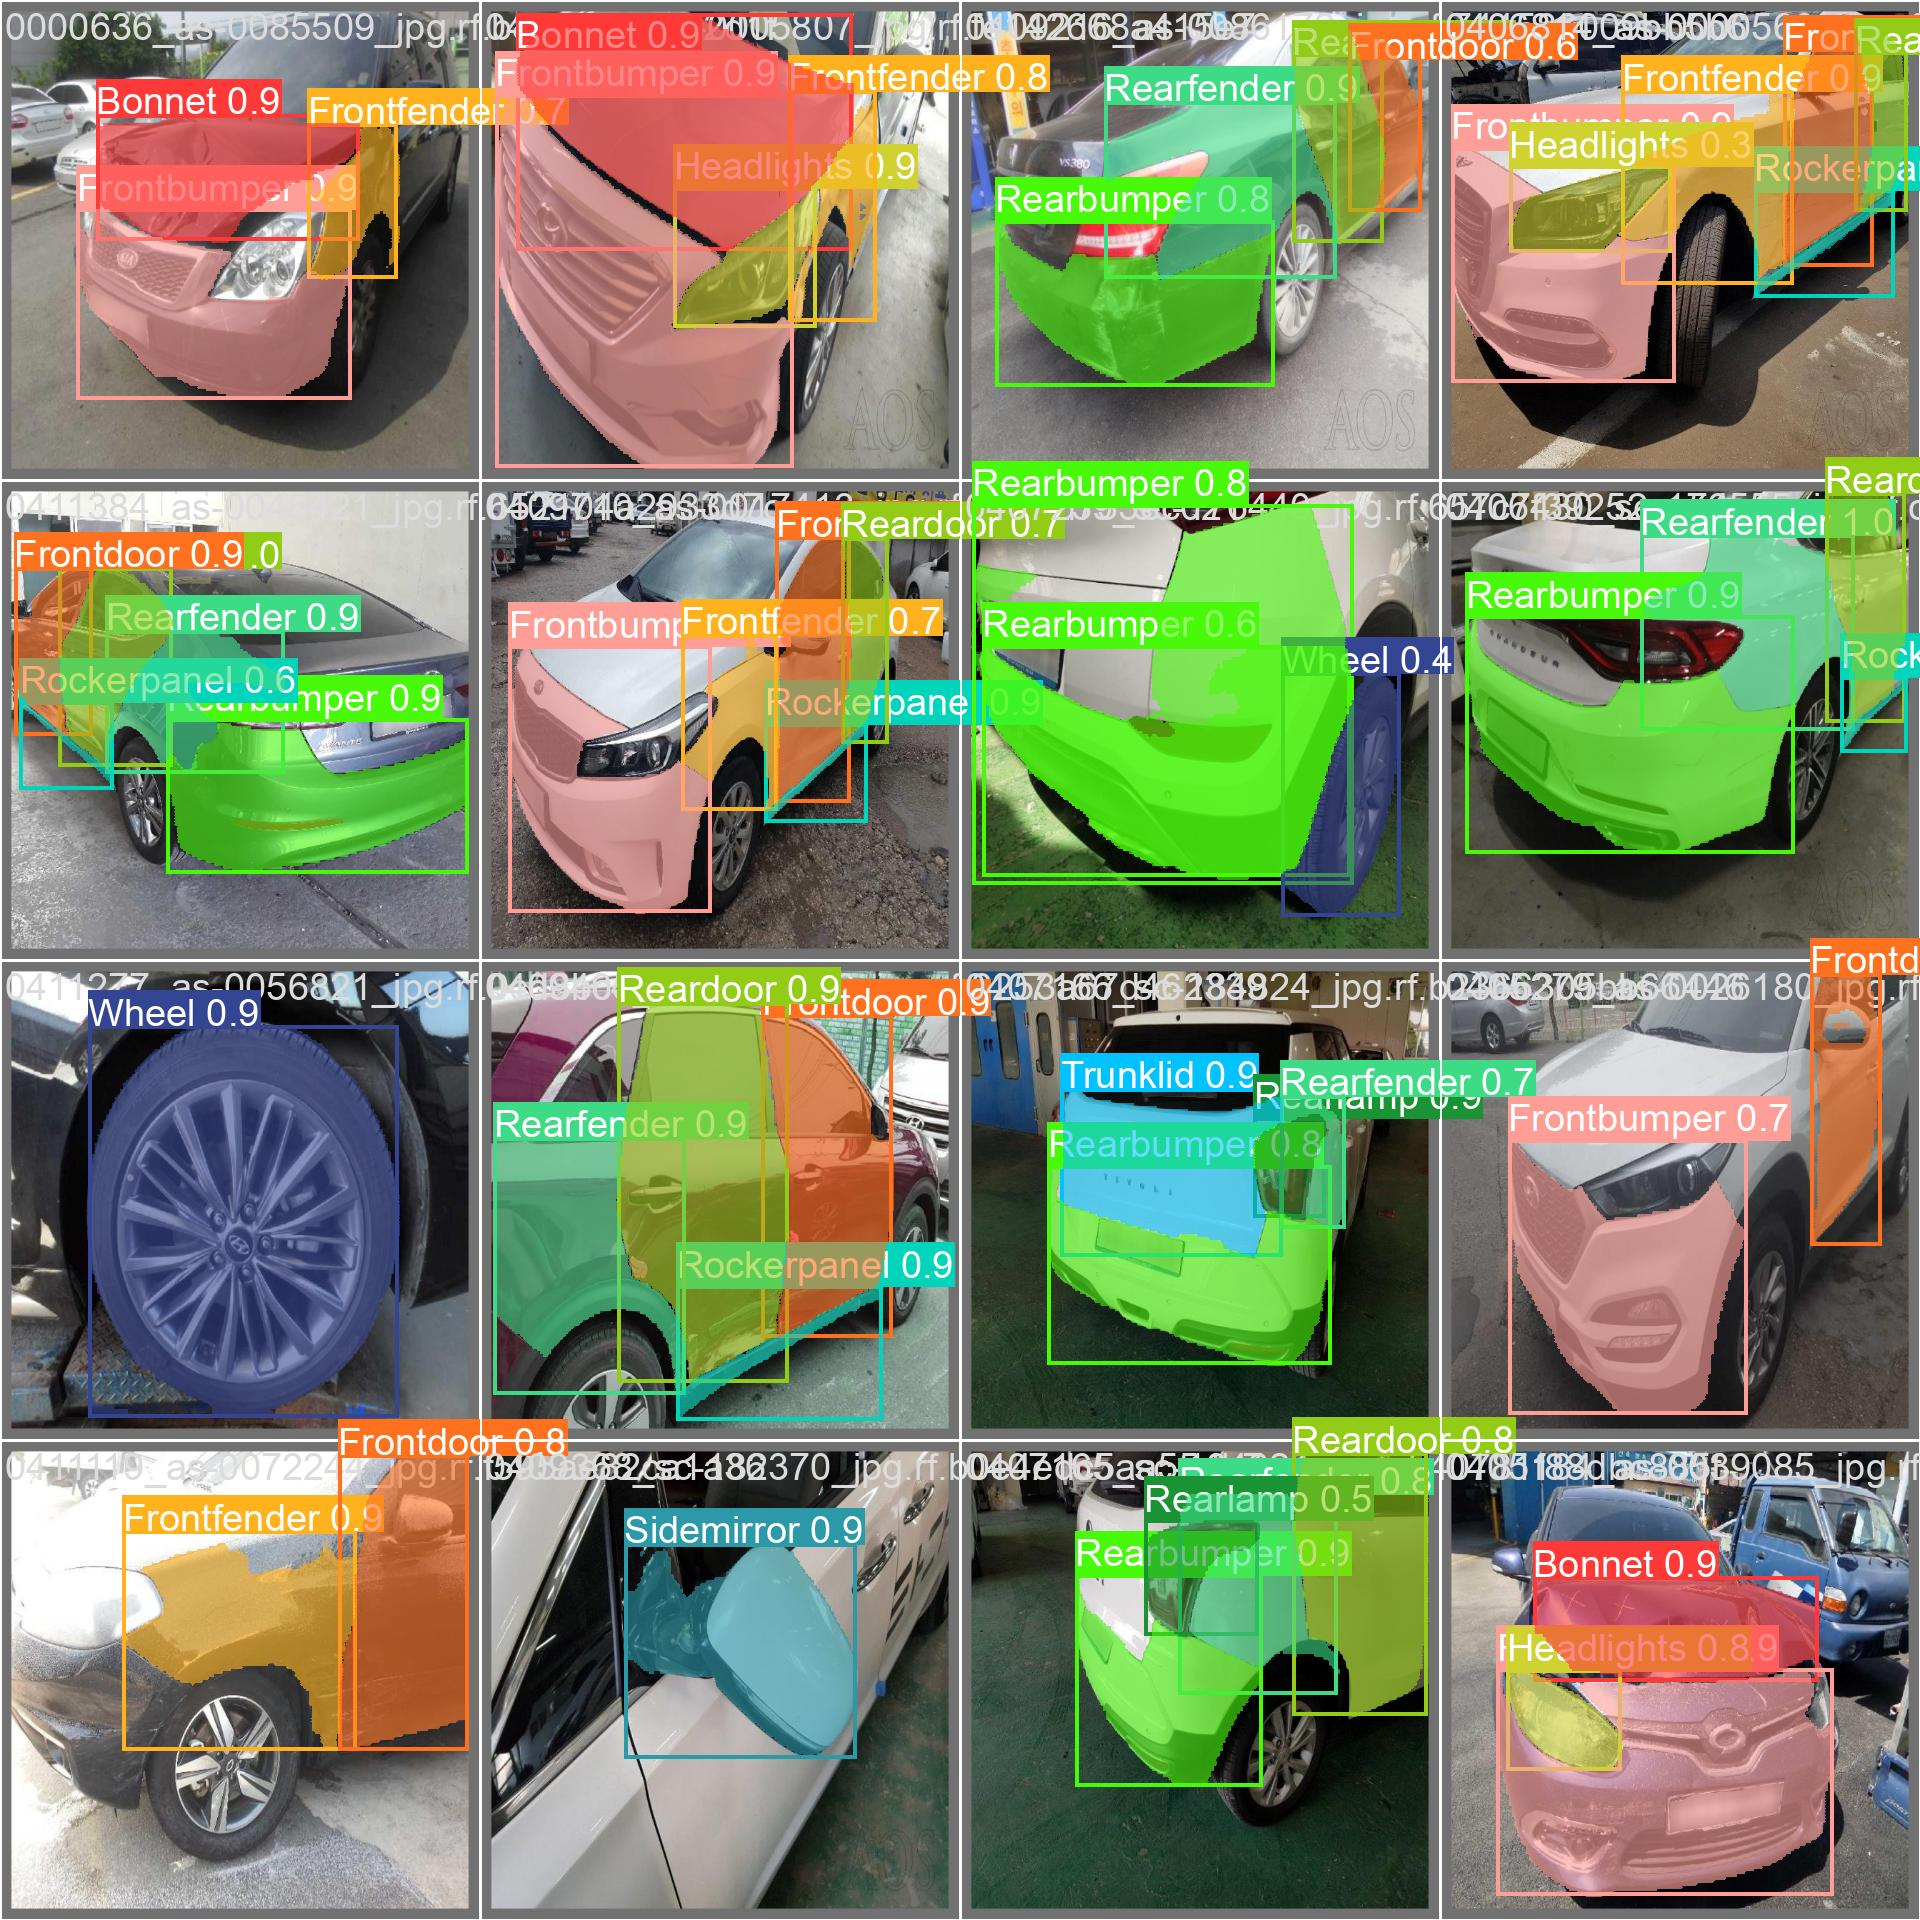

In [20]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [21]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11785018 parameters, 0 gradients, 42.5 GFLOPs
val: Scanning /content/datasets/part-autolabeld-1/valid/labels.cache... 1898 images, 29 backgrounds, 0 corrupt: 100% 1898/1898 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/datasets/part-autolabeld-1/valid/images/0029502_sc-161833_jpg.rf.40eeba48560d34f2cbd859697ea95efc.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/datasets/part-autolabeld-1/valid/images/0177909_as-0042156_jpg.rf.8927d586156073ceed82fc4b8664c8f9.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/datasets/part-autolabeld-1/valid/images/0237724_as-0068252_jpg.rf.ffa61a1a0d1e355dbeab93927cb3b5f8.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/datasets/part-autolabeld-1/valid/images/0259102_sc-150122_jpg.rf.7a91cb6d189de652c6188f143136b66b.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/datasets/part-autolabeld-

## Inference with Custom Model

In [22]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=true

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11785018 parameters, 0 gradients, 42.5 GFLOPs

image 1/950 /content/datasets/part-autolabeld-1/test/images/0001176_as-0066940_jpg.rf.754c47942577ccf90fb7f56410bbfced.jpg: 640x640 1 Frontdoor, 1 Rearbumper, 1 Reardoor, 1 Rearfender, 1 Rockerpanel, 1 Trunklid, 20.5ms
image 2/950 /content/datasets/part-autolabeld-1/test/images/0001299_sc-150389_jpg.rf.98e8358ba46b659b5913d596e5bf4e26.jpg: 640x640 2 Frontdoors, 20.5ms
image 3/950 /content/datasets/part-autolabeld-1/test/images/0001552_as-0073135_jpg.rf.41a9142befd1c5316ba598dfb796f5cd.jpg: 640x640 1 Bonnet, 1 Frontbumper, 1 Frontdoor, 1 Frontfender, 1 Headlights, 1 Reardoor, 1 Rockerpanel, 20.5ms
image 4/950 /content/datasets/part-autolabeld-1/test/images/0002076_as-0069974_jpg.rf.626f9f72f30c98ae721746d99b2e7625.jpg: 640x640 1 Rearlamp, 20.5ms
image 5/950 /content/datasets/part-autolabeld-1/test/images/

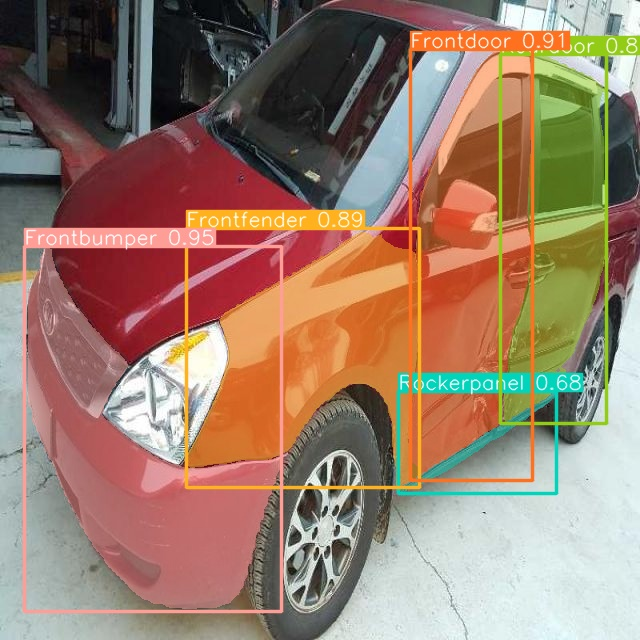

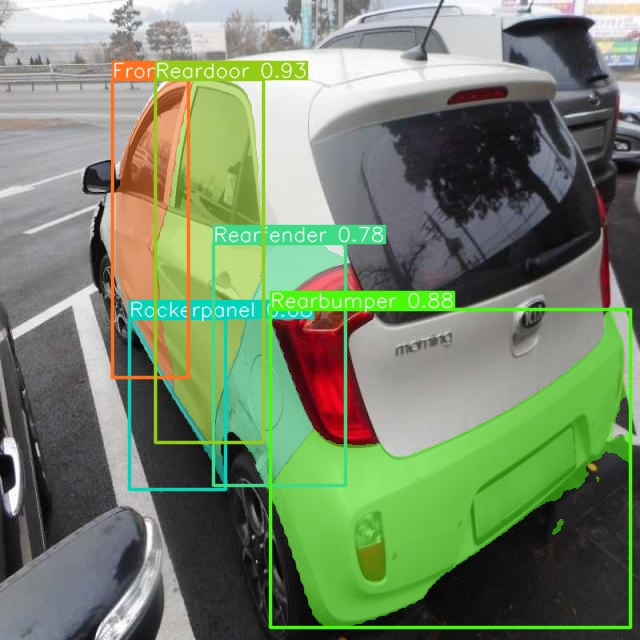

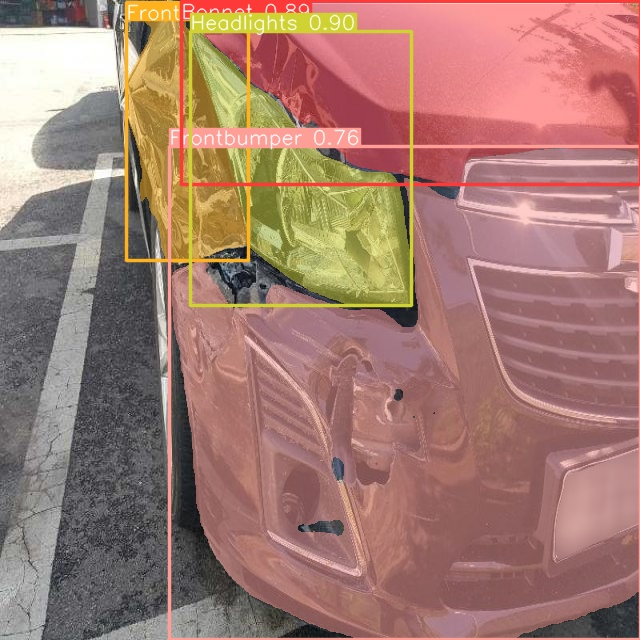

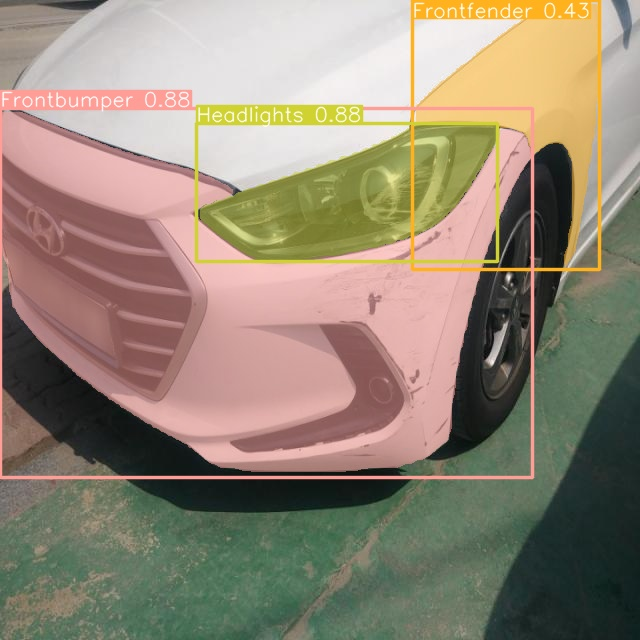

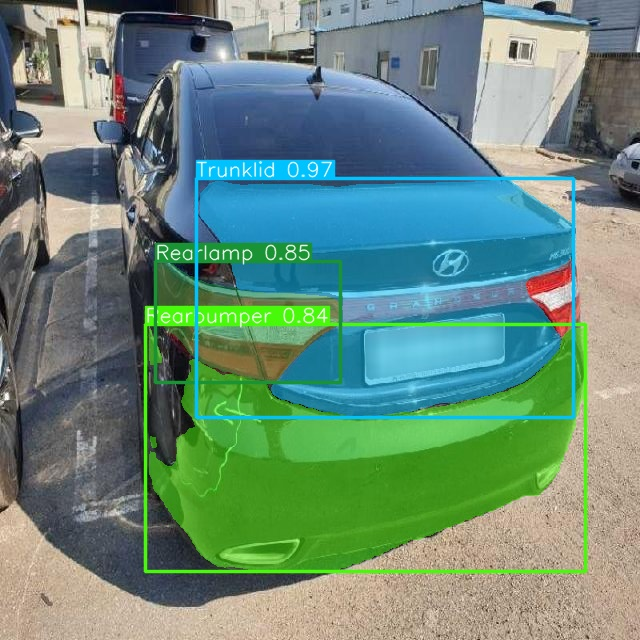

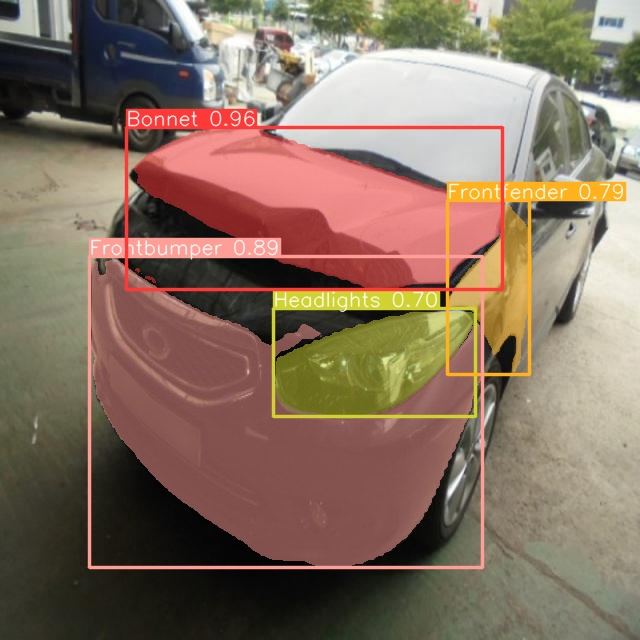

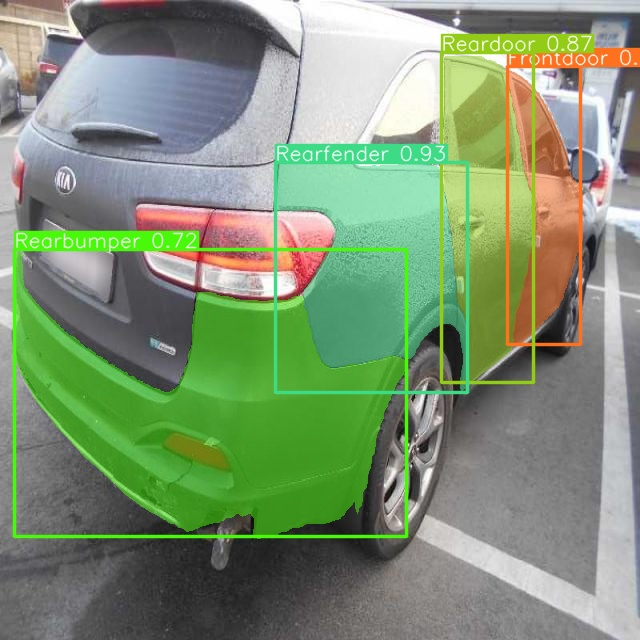

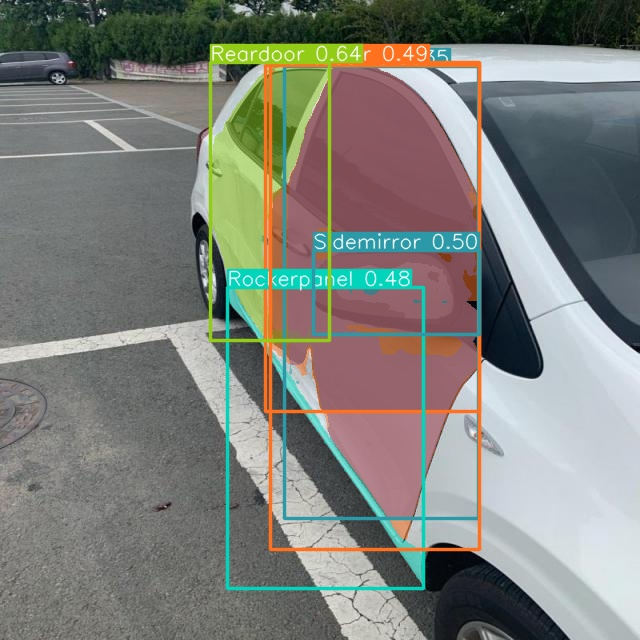

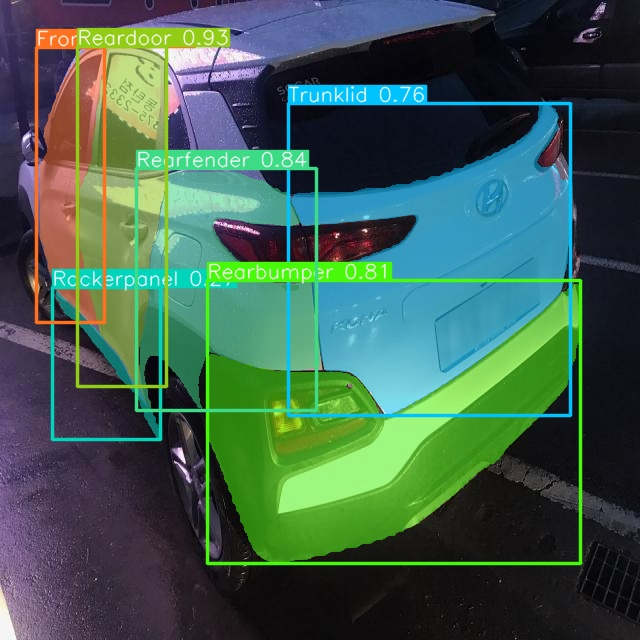

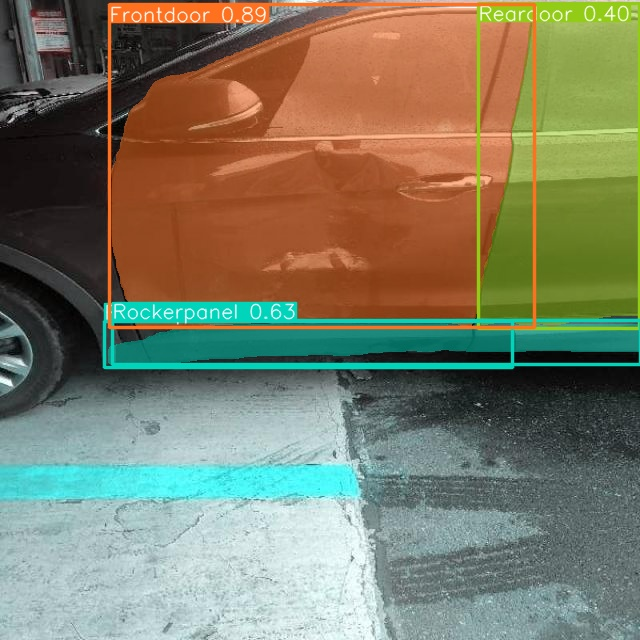

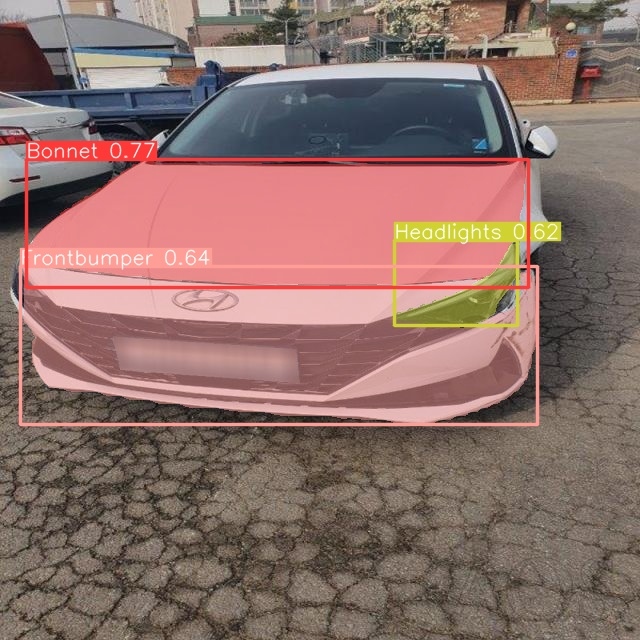

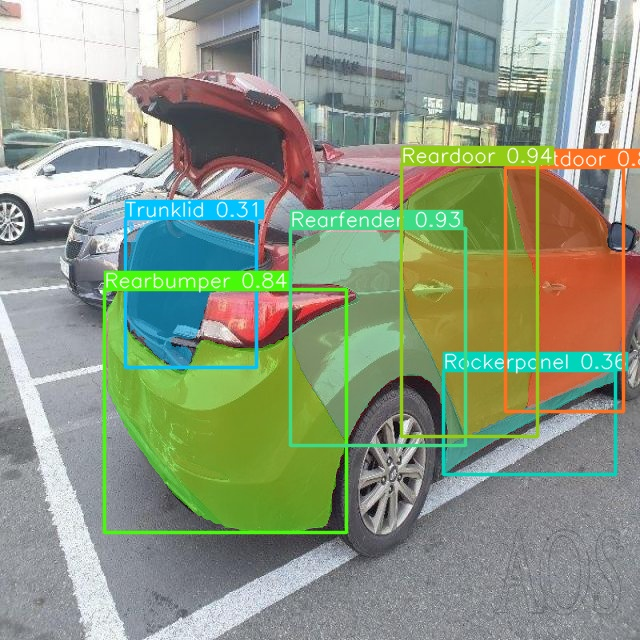

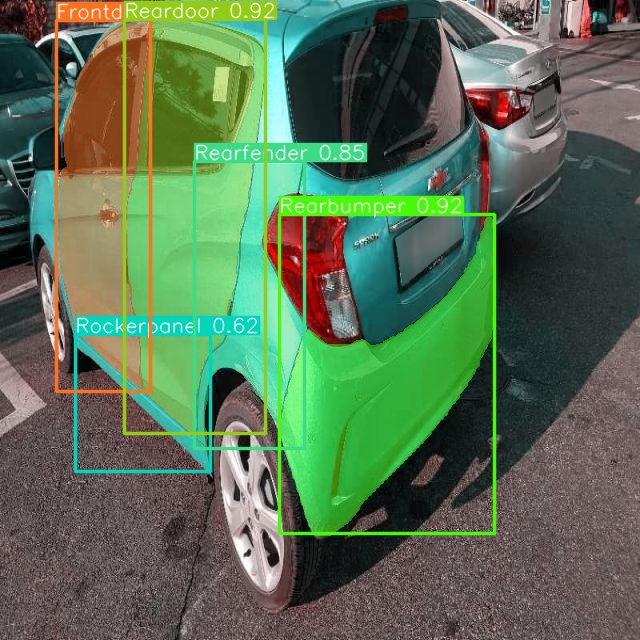

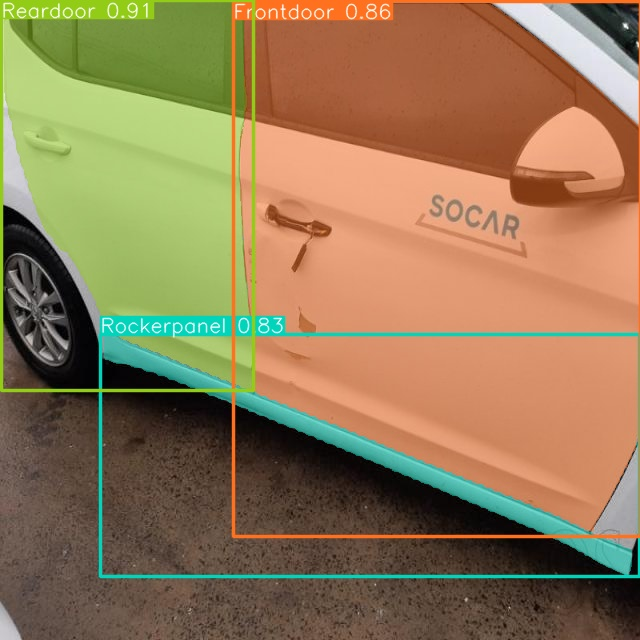

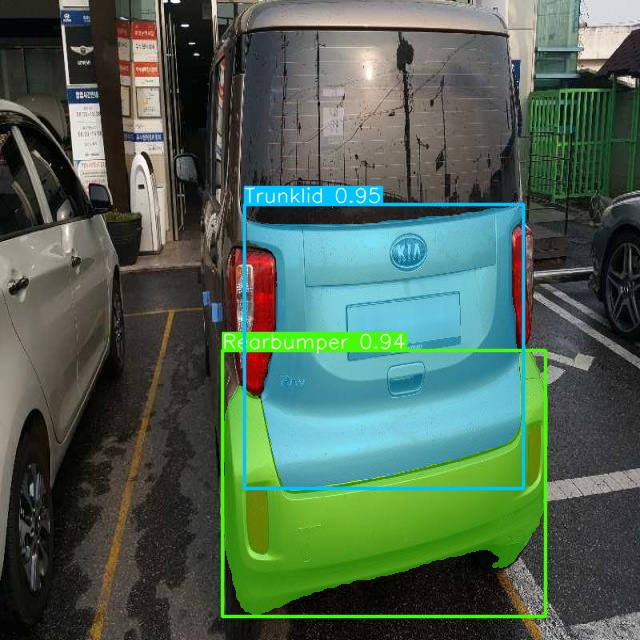

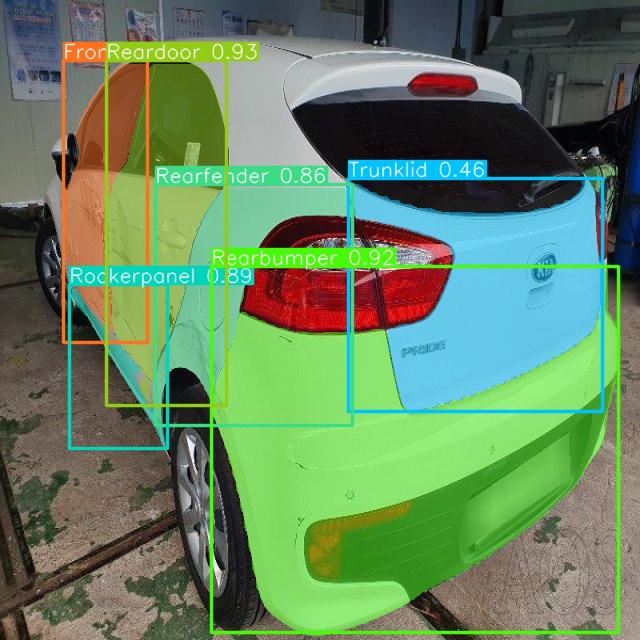

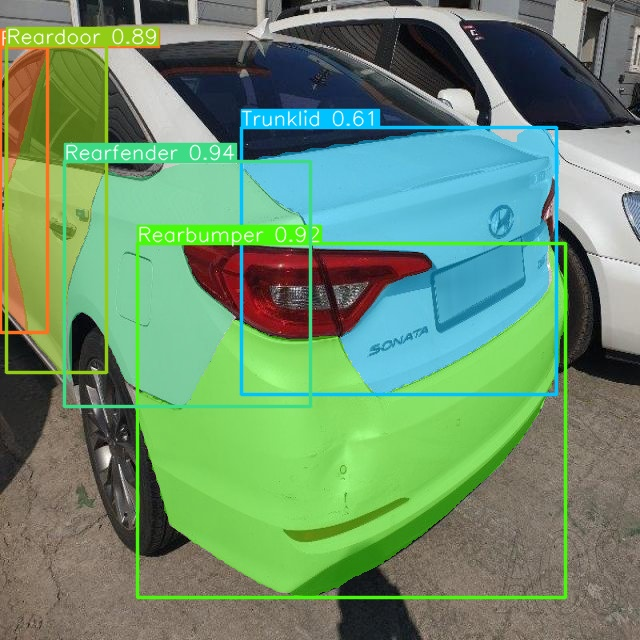

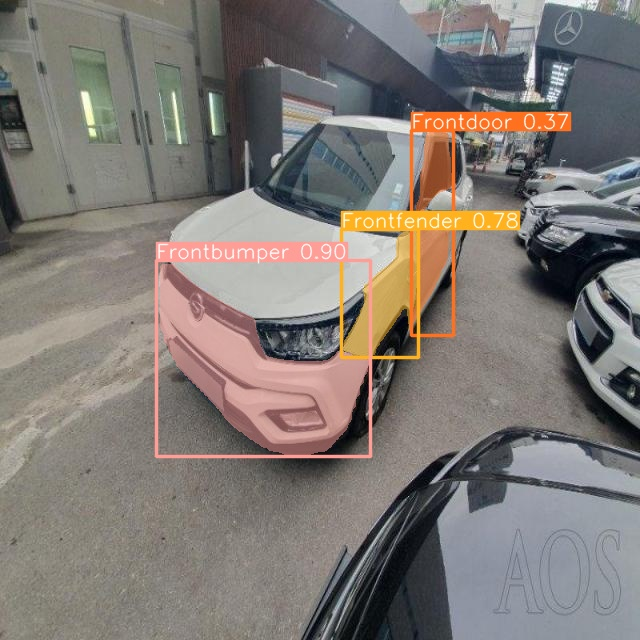

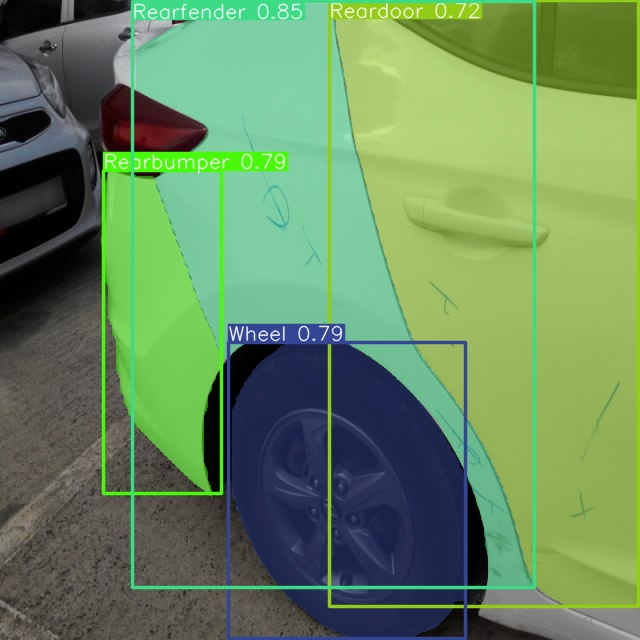

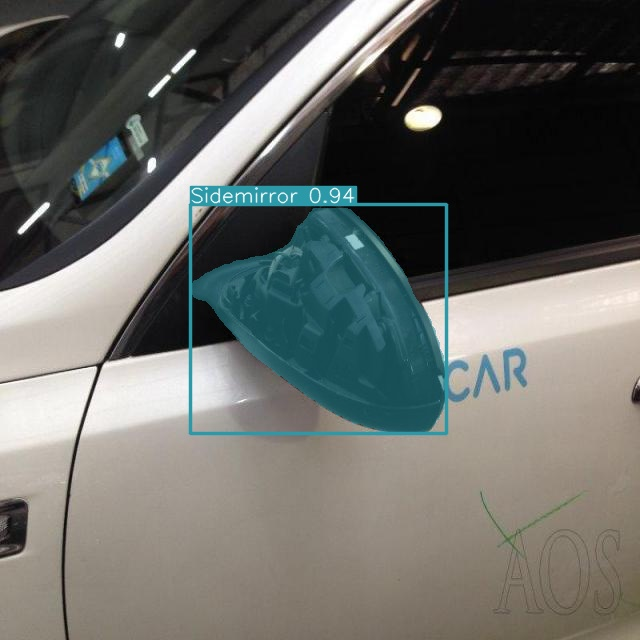

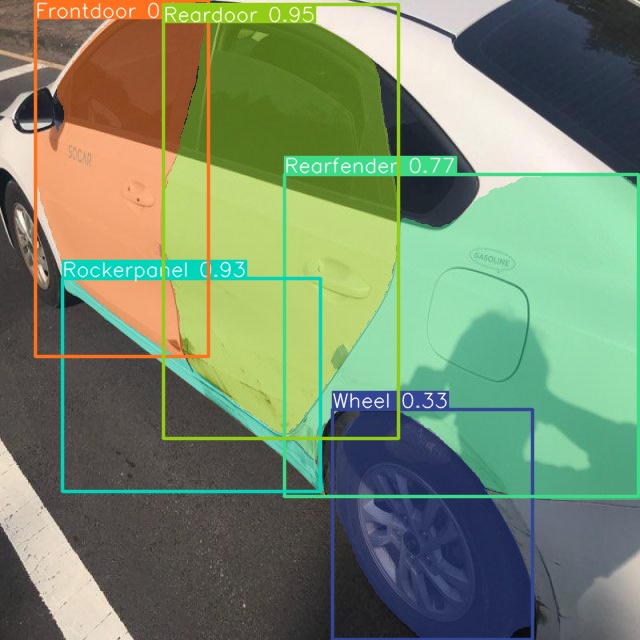

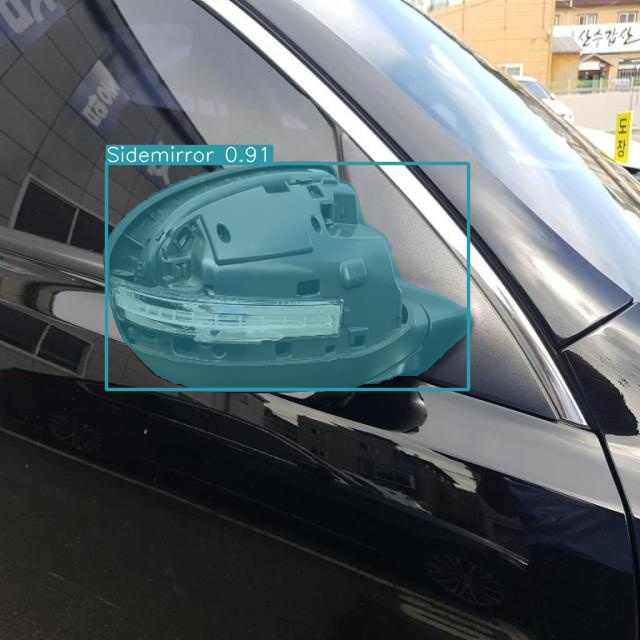

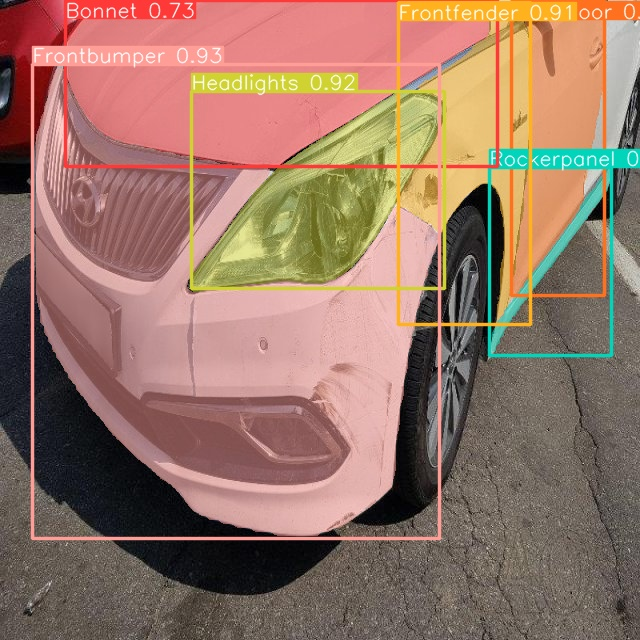

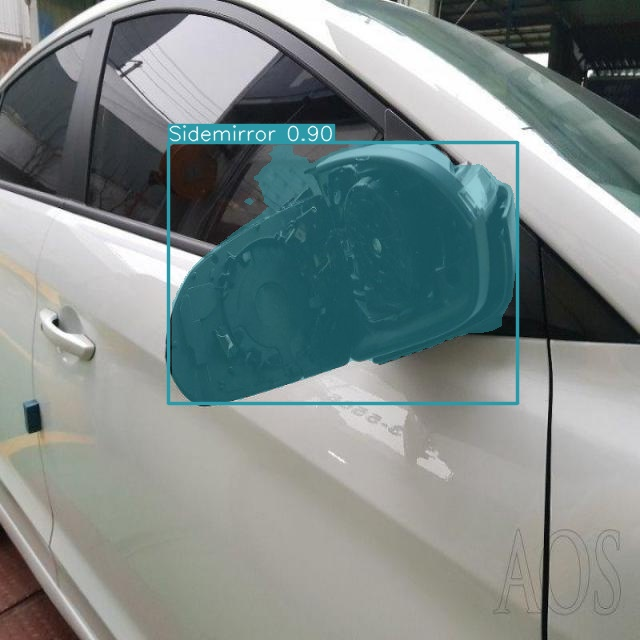

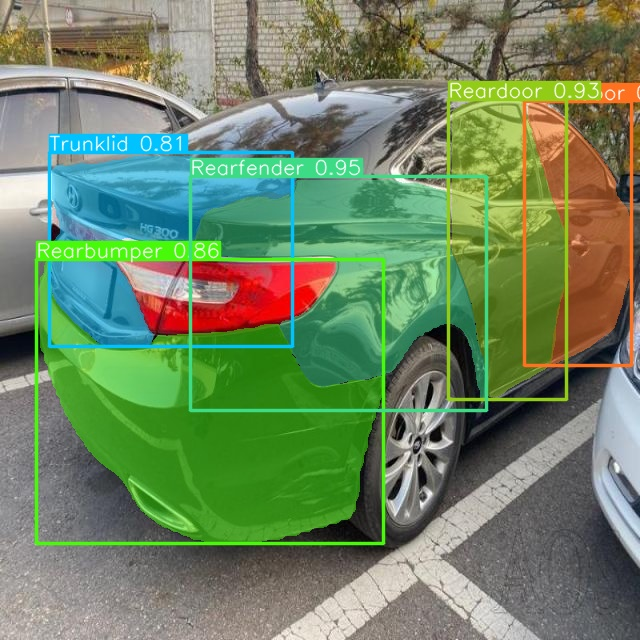

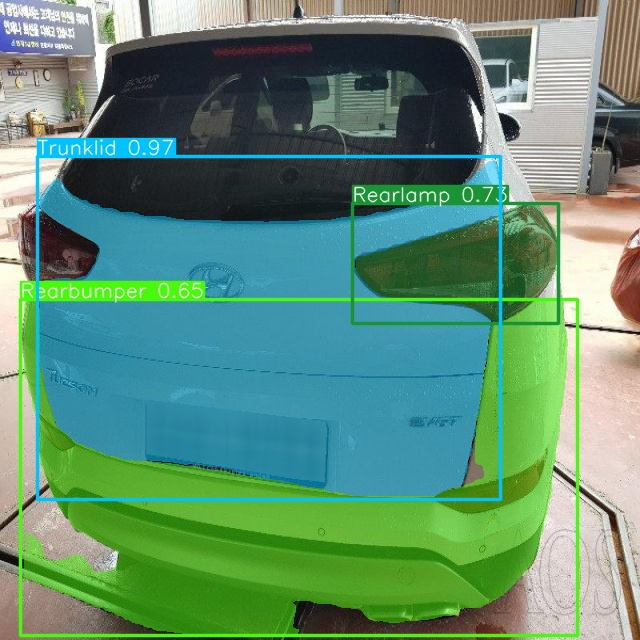

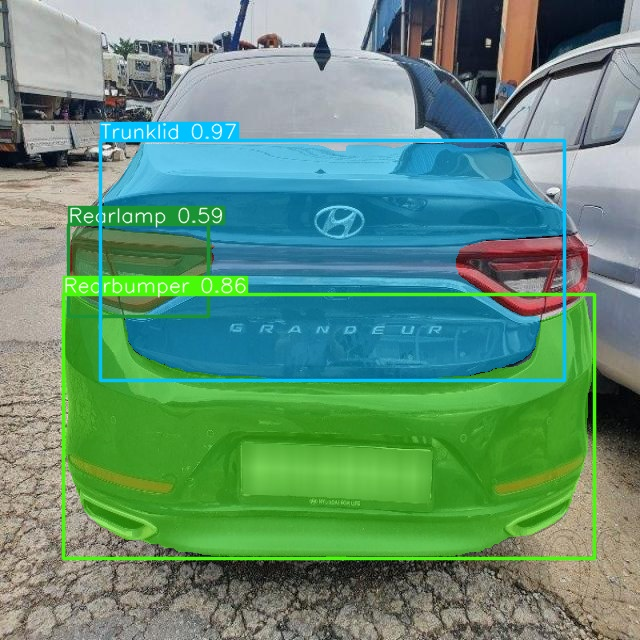

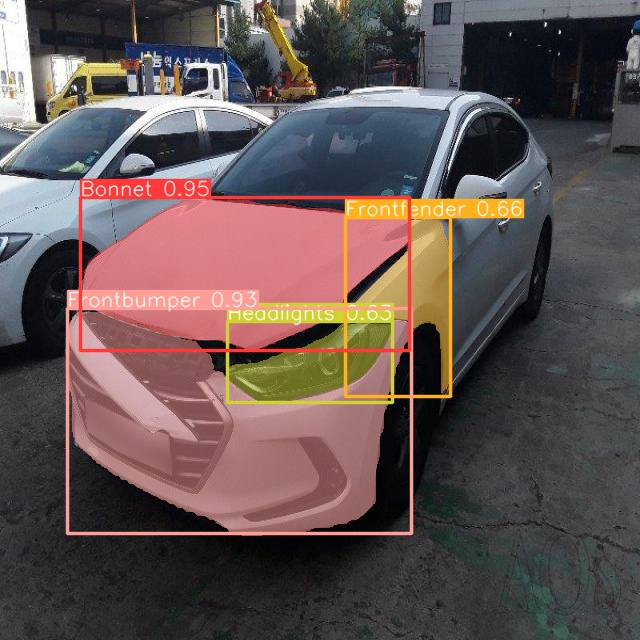

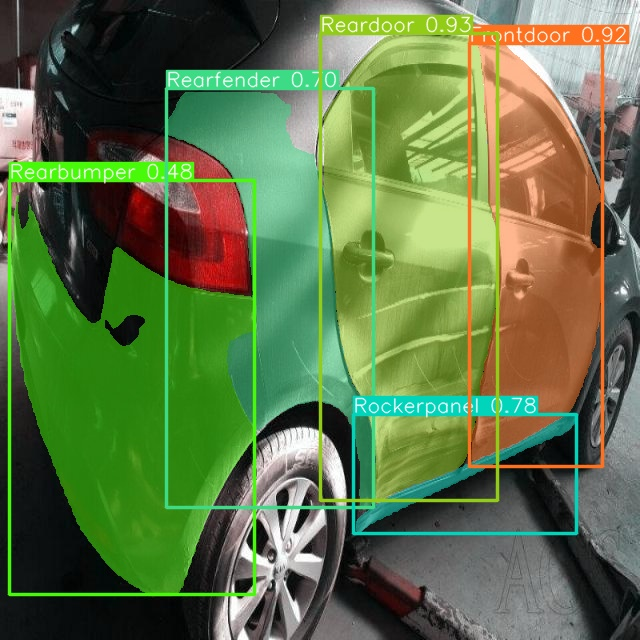

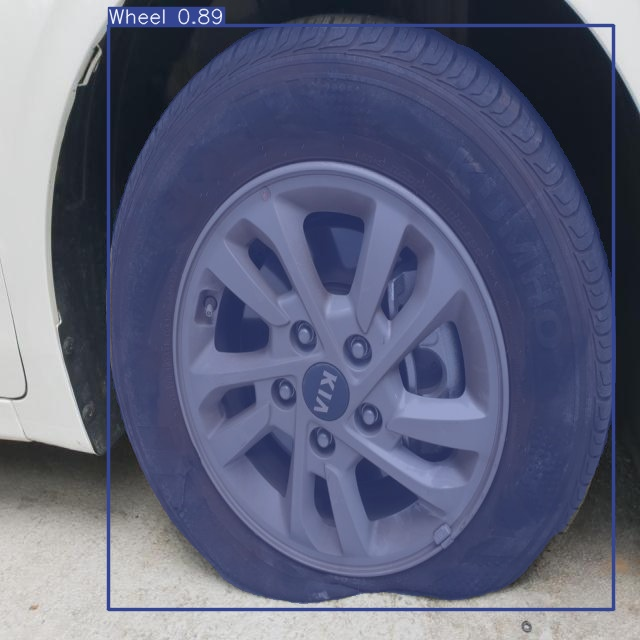

In [25]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict2/*.jpg')[:30]:
      display(Image(filename=image_path, height=600))
      print("\n")